$s$

In [13]:
import ipywidgets as widgets
out = widgets.Output()
with out:
    
    %bookmark 'model_dir'
    current_dir = %pwd
    while 'models' in current_dir:
        %cd ..
        current_dir = %pwd
    %bookmark 'base_dir'
    %cd source_code
    out.clear_output()
%run base
%run gui_v6
with out:
    %cd ..
    %cd models/st100_v1/front_suspension
    out.clear_output()

m=model()
m.show()

## VEHICLE DYNAMICS MODELING AND SIMULATION TOOL

In [8]:
m.show_data_flow()

Output()

In [12]:
nx.write_gpickle(m.data_graph,'system_data_graph_23April_pickel')

In [31]:
for n in m.data_graph.nodes:
    try:
        if m.data_graph.node[n]['typ']=='joint':
            j=m.data_graph.node[n]['obj']
            m.topology.add_edge(j.i_body,j.j_body,joint=j) 
    except KeyError:
        pass

<20x15 sparse matrix of type '<class 'numpy.float64'>'
	with 40 stored elements in Compressed Sparse Row format>

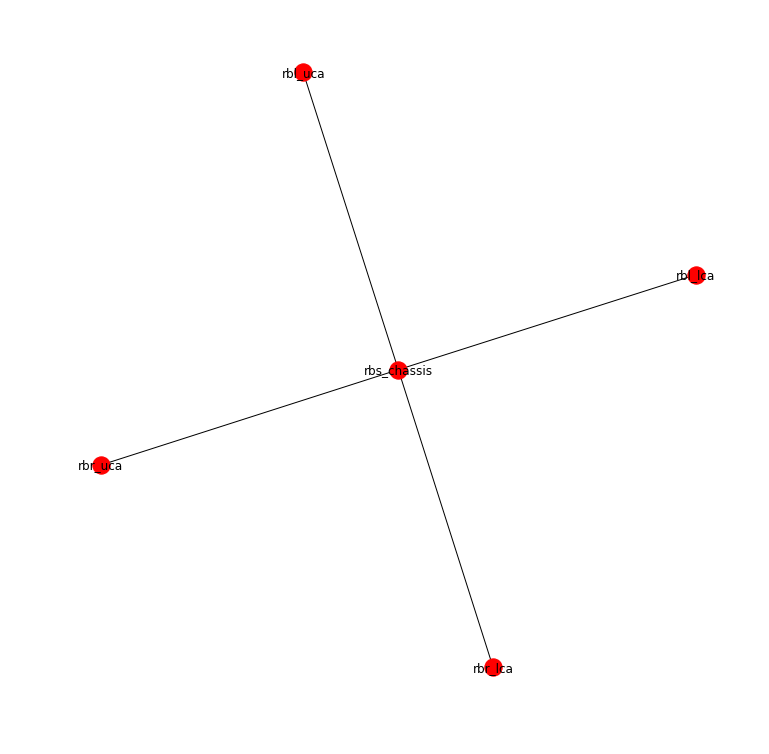

In [7]:
plt.figure(figsize=(10,10))
layout=nx.spring_layout(m.topology)
nx.draw(m.topology,pos=layout,with_labels=True)
plt.show()

In [36]:
m.bodies

rbl_lca                    rbl_lca
rbl_strut_lower    rbl_strut_lower
rbl_strut_upper    rbl_strut_upper
rbl_tie_rod            rbl_tie_rod
rbl_uca                    rbl_uca
rbl_upright            rbl_upright
rbl_wheel_hub        rbl_wheel_hub
rbr_lca                    rbr_lca
rbr_strut_lower    rbr_strut_lower
rbr_strut_upper    rbr_strut_upper
rbr_tie_rod            rbr_tie_rod
rbr_uca                    rbr_uca
rbr_upright            rbr_upright
rbr_wheel_hub        rbr_wheel_hub
rbs_chassis            rbs_chassis
dtype: object

In [19]:
m.object_successors('rbl_strut_upper')

Output()

In [46]:
m.object_predecessors('jcl_uca_rev')

Output()

In [27]:
nx.write_gpickle(m.data_flow,'data_flow')

In [3]:
g=nx.read_gpickle('data_flow')

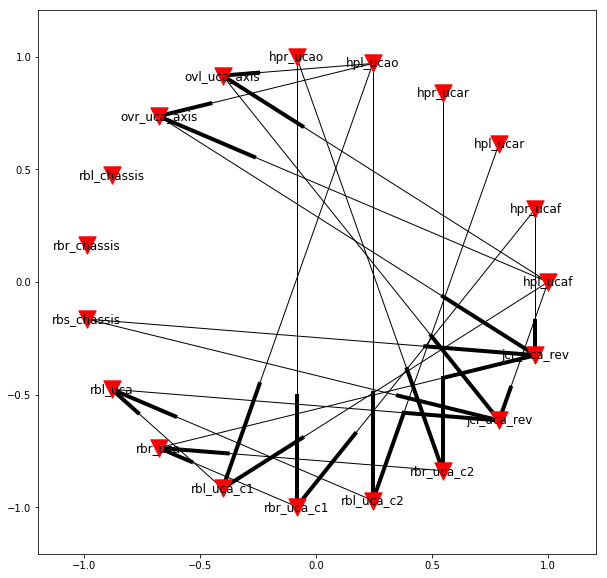

In [40]:
gpos=nx.shell_layout(m.data_graph)
plt.figure(figsize=(10,10))
nx.draw_networkx(m.data_graph,gpos,with_labels=True,node_shape='v')
plt.show()

In [68]:
[g.node[n]['obj'] for n in g if type(g.node[n]['obj'])==point]

[point object at [0 0 0],
 point object at [0 0 0],
 point object at [ 134. -343.  807.],
 point object at [ 134.  343.  807.],
 point object at [   0. -812.  807.],
 point object at [   0.  812.  807.],
 point object at [-268.    0.    0.],
 point object at [-268.   -0.    0.]]

In [33]:
p=pd.Series([g.node[n]['obj'] for n in g if type(g.node[n]['obj'])==point],index=[g.node[n]['obj'].name for n in g if type(g.node[n]['obj'])==point])

In [67]:
g.add_node('hpr_ucaf',obj=point('ucaf',[0,0,0]))

In [45]:
def edit_node(graph,node):
    for e in nx.edge_dfs(graph,node):

        try:
            graph.node[e[1]]['obj'].__setattr__(graph.edges[e]['attr'],graph.node[e[0]]['obj'])
            print('Editing object "%s" and updating attribute "%s" in dependency %s \n'%(e[0],graph.edges[e]['attr'],e[1]))
        except KeyError:
            print('Not Found \n')
            pass

In [70]:
edit_node(g,'jcl_uca_rev')